### Scrapping code

### Initial library

In [2]:
from datetime import datetime as dt
from utils.yf_utils import download_stock_data
from utils.prepropcessing_utils import data_to_df, transfrom_features, plot_data, outlier, plot_macd, plot_category, get_correlaton_mt, plot_box, anova_check
import pandas as pd
from utils.scrape_set50 import scrape_data
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder



### Example data scrapping from SET50

In [3]:
from utils.scrape_set50 import scrape_data

df = scrape_data(url="https://www.set.or.th/en/market/index/set50", save_to_csv=False)

SET50 Constituents at 2025-07-10 13:41:57: 
      Name    Open    High     Low    Last Change Change %     Bid   Offer  \
0   ADVANC  284.00  285.00  282.00  284.00   0.00     0.00  283.00  284.00   
1      AOT   30.25   30.75   30.00   30.50  +0.25    +0.83   30.25   30.50   
2      AWC    1.88    1.90    1.85    1.87   0.00     0.00    1.86    1.87   
3    BANPU    4.12    4.14    4.08    4.10  -0.02    -0.49    4.10    4.12   
4      BBL  143.50  145.00  143.50  143.50   0.00     0.00  143.50  144.00   
5      BCP   29.75   30.00   29.25   29.50  -0.25    -0.84   29.50   29.75   
6     BDMS   20.10   20.20   19.90   20.00  -0.10    -0.50   19.90   20.00   
7      BEM    4.88    5.10    4.76    5.10  +0.26    +5.37    5.05    5.10   
8       BH  137.50  138.00  135.50  136.00  -1.50    -1.09  136.00  136.50   
9      BJC   18.60   18.80   18.40   18.70   0.00     0.00   18.70   18.80   
10     BTS    3.48    3.50    3.36    3.44   0.00     0.00    3.44    3.46   
11     CBG   53.25  

In [4]:
df

,Name,Open,High,Low,Last,Change,Change %,Bid,Offer,Volume,Value(baht)
0,ADVANC,284.00,285.00,282.00,284.00,0.00,0.00,283.00,284.00,"5,073,731","1,439,535.85"
1,AOT,30.25,30.75,30.00,30.50,+0.25,+0.83,30.25,30.50,"10,806,395","328,872.54"
2,AWC,1.88,1.90,1.85,1.87,0.00,0.00,1.86,1.87,"50,273,499","94,114.17"
3,BANPU,4.12,4.14,4.08,4.10,-0.02,-0.49,4.10,4.12,"9,450,171","38,776.51"
4,BBL,143.50,145.00,143.50,143.50,0.00,0.00,143.50,144.00,"5,313,351","765,860.14"
5,BCP,29.75,30.00,29.25,29.50,-0.25,-0.84,29.50,29.75,"2,070,569","61,259.48"
6,BDMS,20.10,20.20,19.90,20.00,-0.10,-0.50,19.90,20.00,"26,688,751","534,277.04"
7,BEM,4.88,5.10,4.76,5.10,+0.26,+5.37,5.05,5.10,"108,063,117","533,413.69"
8,BH,137.50,138.00,135.50,136.00,-1.50,-1.09,136.00,136.50,"1,827,902","249,272.45"
9,BJC,18.60,18.80,18.40,18.70,0.00,0.00,18.70,18.80,"1,471,232","27,290.10"


## PROCESSE1: ETL and EDA process for SET50 tickers

### STEP1: Saved data to csv from SET50

```
.
.
.
Data saved to data/TTB_BK.csv
df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed
Data saved to data/TU_BK.csv
df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed
Data saved to data/VGI_BK.csv
df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed
Data saved to data/WHA_BK.csv
```
       


### STEP2: Load the saved CSV files into DataFrames


In [5]:
# STEP2: Load the saved CSV files into DataFrames
file_path = 'data/PTT_BK.csv'
df = data_to_df(file_path)           
print(f"Data for PTT_BK loaded successfully. Number of rows: {len(df)}")

Data for PTT_BK loaded successfully. Number of rows: 5797


In [6]:
df.tail(10)

,Date,Open,High,Low,Close,Volume
5787,2025-05-19,31.00,31.25,30.75,31.00,32321500
5788,2025-05-20,31.00,31.00,30.75,30.75,10621300
5789,2025-05-21,31.00,31.00,30.50,30.75,57019900
5790,2025-05-22,30.50,30.75,30.25,30.50,32095000
5791,2025-05-23,30.75,30.75,30.25,30.50,26930600
5792,2025-05-26,30.50,30.75,30.25,30.25,29419300
5793,2025-05-27,30.25,30.50,30.00,30.25,48403000
5794,2025-05-28,30.25,30.50,30.25,30.25,16106200
5795,2025-05-29,30.50,30.50,30.25,30.25,12466700
5796,2025-05-30,30.25,30.50,29.75,29.75,84654300


### STEP3: Plotting the data

Column: Date
count                             5797
mean     2013-07-15 19:32:43.015352832
min                2001-12-06 00:00:00
25%                2007-08-02 00:00:00
50%                2013-07-02 00:00:00
75%                2019-06-10 00:00:00
max                2025-05-30 00:00:00
Name: Date, dtype: object




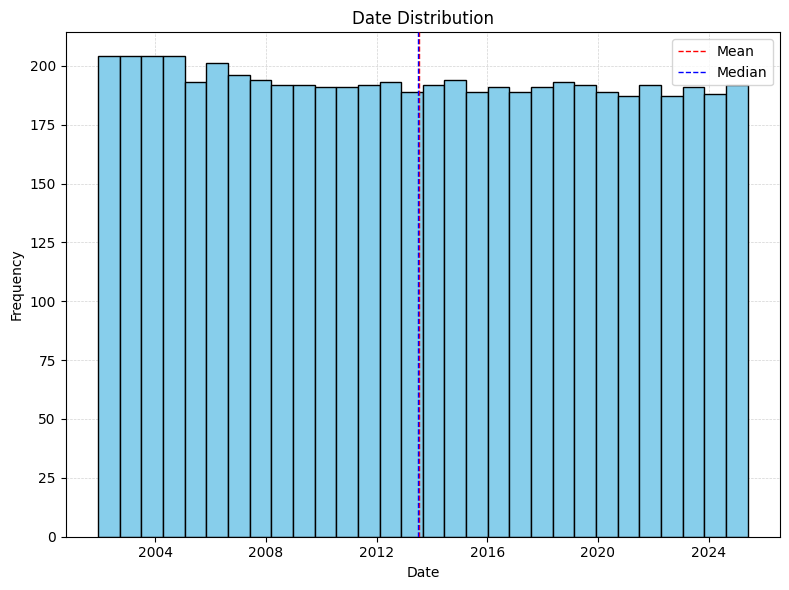

Column: Open
count    5797.000000
mean       19.300436
std        10.241416
min         1.105145
25%        10.769729
50%        18.617575
75%        29.332556
max        41.424304
Name: Open, dtype: float64




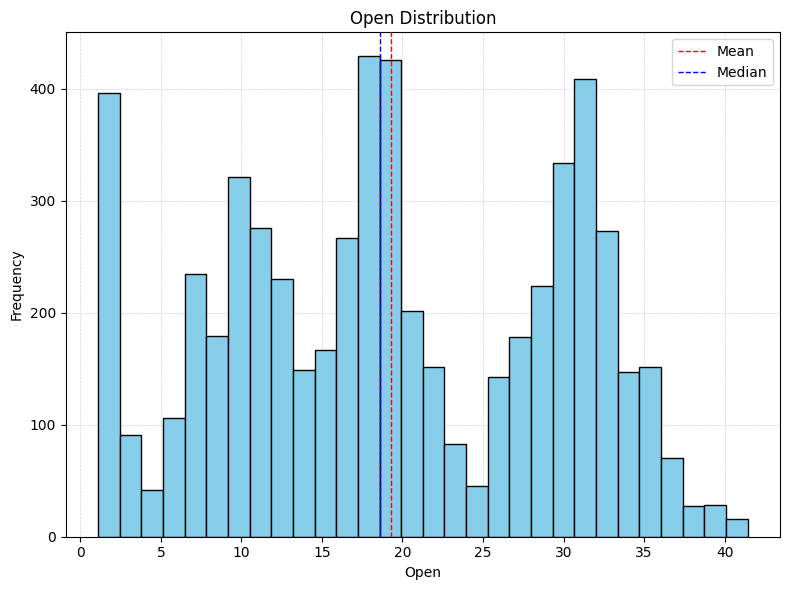

Column: High
count    5797.000000
mean       19.489742
std        10.324141
min         1.105145
25%        10.886776
50%        18.741201
75%        29.699999
max        42.060509
Name: High, dtype: float64




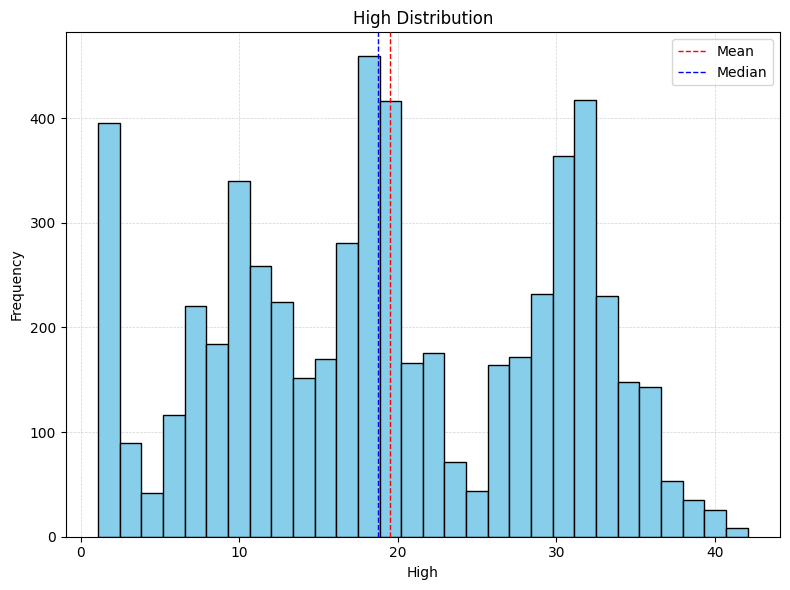

Column: Low
count    5797.000000
mean       19.103958
std        10.154613
min         1.095618
25%        10.631524
50%        18.437950
75%        28.981451
max        40.717402
Name: Low, dtype: float64




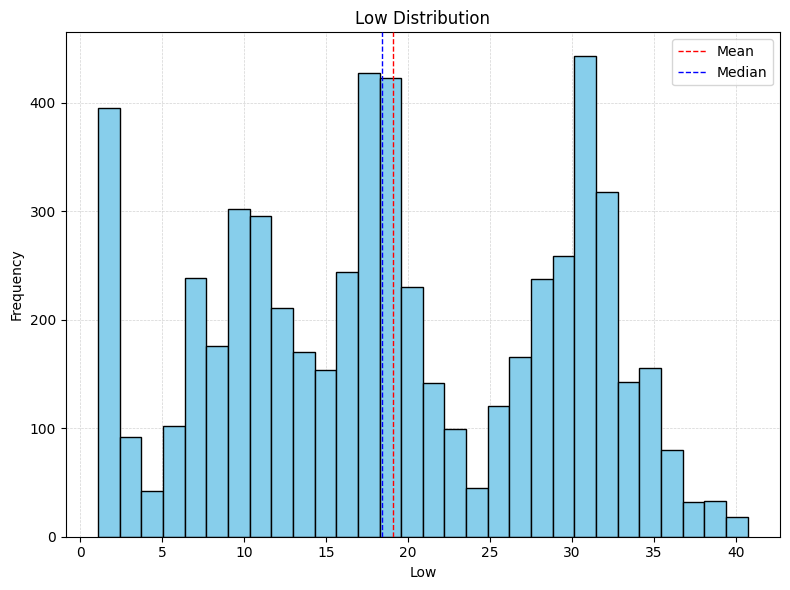

Column: Close
count    5797.000000
mean       19.290955
std        10.235252
min         1.105145
25%        10.763442
50%        18.602346
75%        29.330568
max        41.565681
Name: Close, dtype: float64




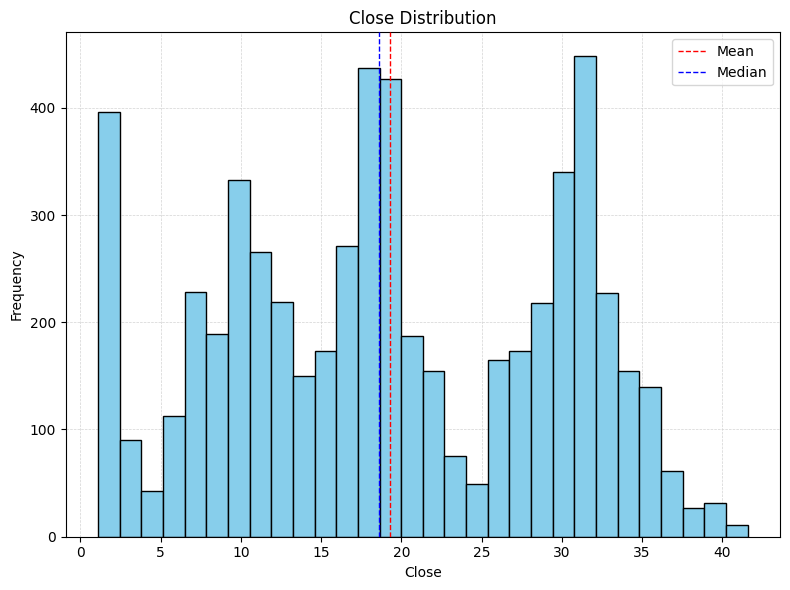

Column: Volume
count    5.797000e+03
mean     5.437149e+07
std      4.607146e+07
min      0.000000e+00
25%      2.979200e+07
50%      4.529000e+07
75%      6.787400e+07
max      1.736808e+09
Name: Volume, dtype: float64




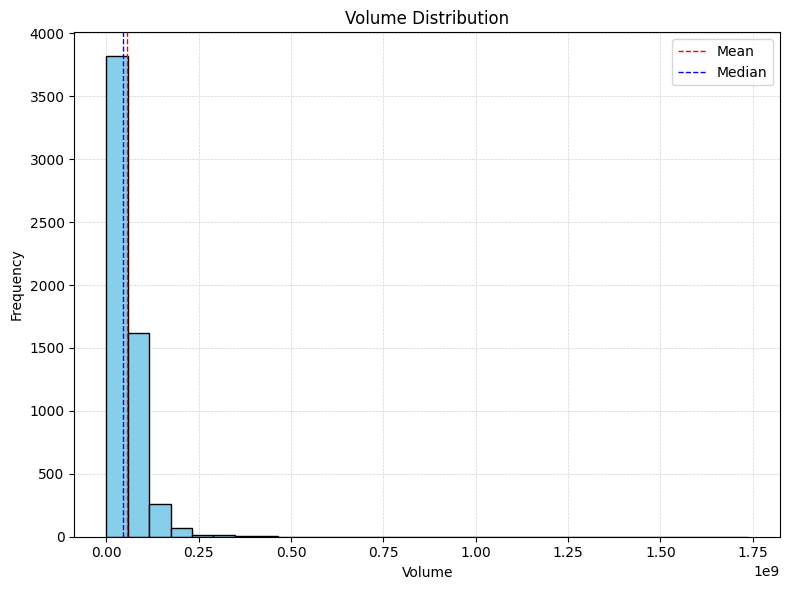

In [7]:
columns = df.columns.tolist()

for col in columns:
    print(f"Column: {col}")
    print(df[col].describe())
    print("\n")

    plot_data(col, df)

### STEP4: Remove outlier and fixing skewness data

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#### Outlier

In [9]:
new_df = outlier(df, col_name='Volume')

outlier.....
outliers from z-score: (70, 7)
Original shape: (5797, 7)
Current shape: (5727, 6)



- Plot check outlier before and after 

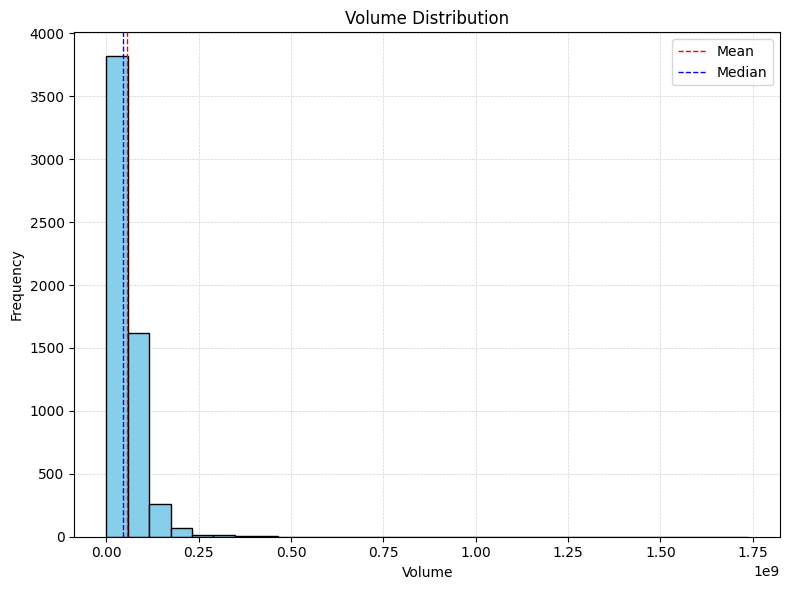

After cutting outlier


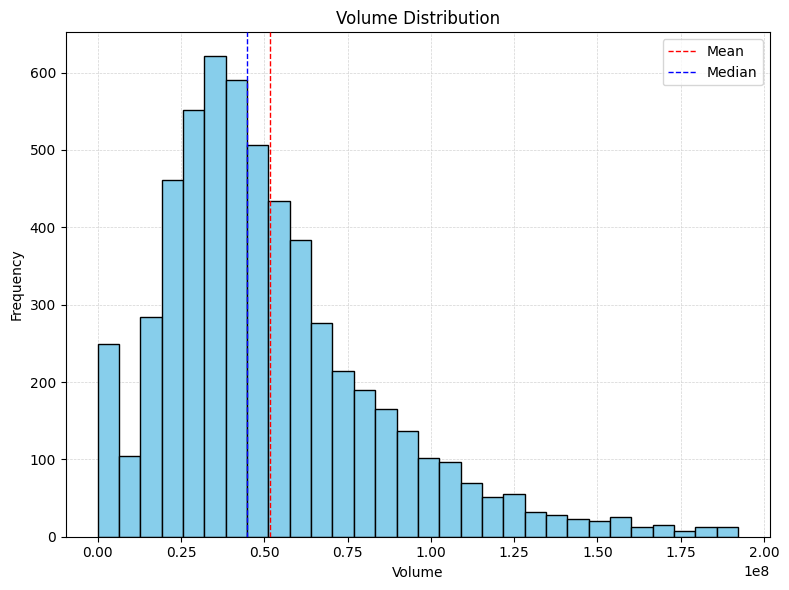

In [10]:
plot_data('Volume', df)
print('After cutting outlier')
plot_data('Volume', new_df)

#### Skewness
- Fixing positive skewness data 

In [11]:
new_df['log_Volume'] = np.log1p(new_df['Volume'])  

new_df['sqrt_Volume'] = np.sqrt(new_df['Volume'])

In [12]:
print(skew(new_df['Volume']))         # Before
print(skew(new_df['log_Volume']))     # After 1
print(skew(new_df['sqrt_Volume']))    # After 2



1.1946134463885594
-5.193681553782286
-0.2620663021159722


- Check result after fixing skewness
    - **log data** make distribusion turn to negative skewness as skewness value: -5.19
    - **squareroot data** distribusion turn to normal distribusion more than above at skewness value: -0.26 (near 0)

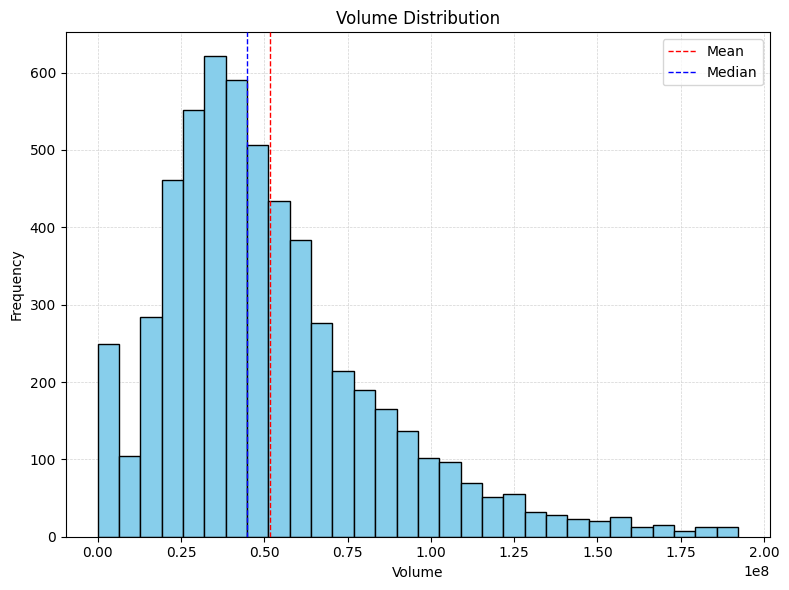

After fixing skewness


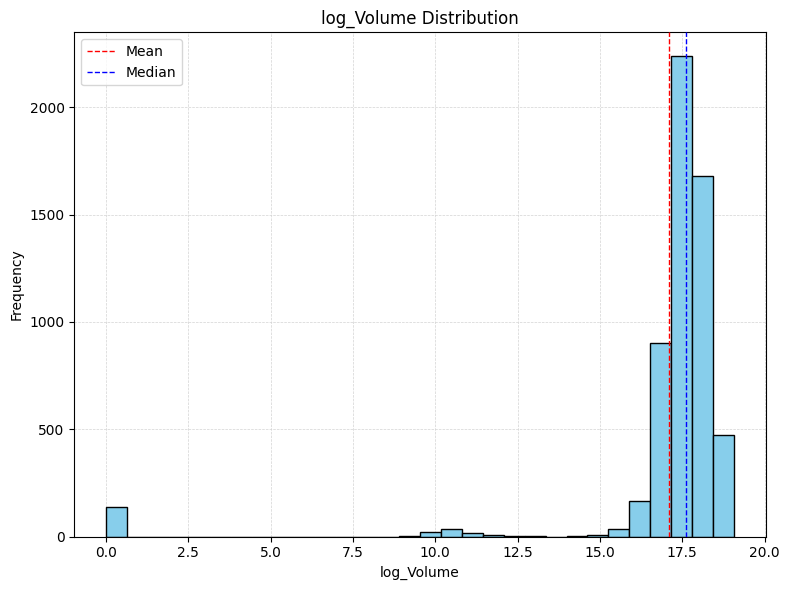

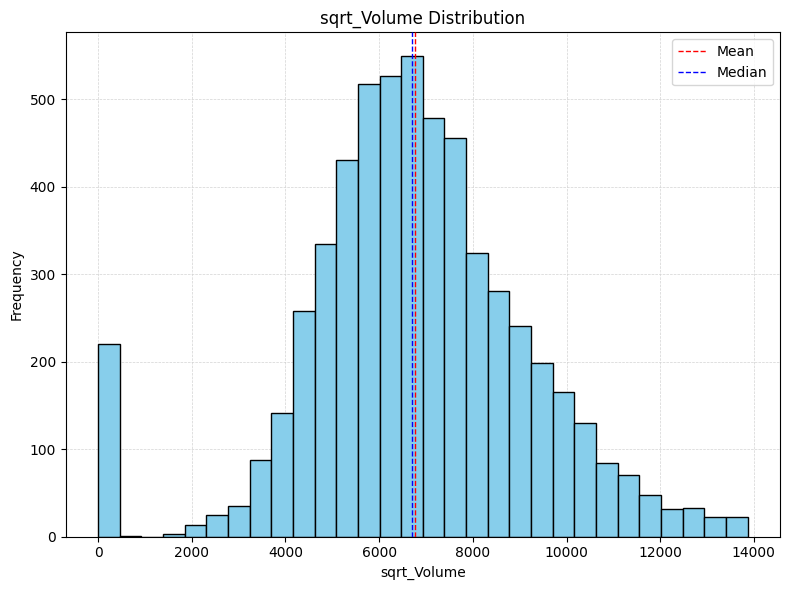

In [13]:
plot_data('Volume', new_df)
print('After fixing skewness')
plot_data('log_Volume', new_df)
plot_data('sqrt_Volume', new_df)

- In case want to original data:

In [14]:
# df['Volume_restored'] = df['sqrt_volume'] ** 2

### STEP5: Transform feaurtures/Feaure Engineering 
 

- Adding Fetaures

    | Feature Type             | Examples                    |
    | ------------------------ | --------------------------- |
    | **Lag features**         | `Close_t-1`, `Volume_t-3`   |
    | **Rolling stats**        | `SMA_5`, `STD_10`, `EMA_10` |
    | **Returns/Change**       | `Daily_Return`, `Diff`      |
    | **Technical Indicators** | `RSI`, `MACD`, `Bollinger`  |
    | **Date-based**           | `Month`, `Weekday`          |
    


- Features:

    - 'Close_t-1'
    - 'Close_t-2'
    - 'Volume_t-1'
    - 'SMA_5'  Simple Moving Average at 5 days
    - 'STD_5' Rolling standard deviation at 5 days 
    - 'EMV_5' Exponential Moving Average at 5 days (React faster than SMA or STD)
    - 'rsi' Relative Strength Index (measures the speed and change of price movements to indicates overbought and oversold with range [0,100])
        - if > 70 indicates overbought (possible reversal or pullback)
        - if < 30 indicates oversold (possible bounce or rally) 
    - 'macd' Moving Average Convergence Divergence (shows the relationship between two EMAs)
        - MACD crosses above signal → Bullish (buy signal)
        - MACD crosses below signal → Bearish (sell signal)
        - Histogram bars show momentum (bigger = stronger trend)
    - Bollinger Bands (BB) measure price volatility and help identify overbought or oversold conditions.
        - Price near upper band → possible overbought
        - Price near lower band → possible oversold
        - Bands widening → higher volatility
        - Bands tightening → low volatility (often before a breakout)
    - ADX measures trend strength in range [0, 100] (up or down)
        - ADX > 25 → strong trend
        - ADX < 20 → weak or no trend
    - +DI / -DI: +DI (Positive Directional Indicator) and  –DI (Negative Directional Indicator) 
            - +DI > -DI → uptrend
            - -DI > +DI → downtrend


In [15]:
 # STEP5:
new_df = transfrom_features(new_df)

In [16]:
new_df

,Date,Open,High,Low,Close,Volume,log_Volume,sqrt_Volume,Close_t-1,Close_t-2,...,adx_result,Daily_Return,Close_Diff_t-1,future_return_5,Year,Quarter,Day,Month,Weekday,target
2,2001-12-10,1.257579,1.257579,1.257579,1.257579,0,0.000000,0.000000,NaN,NaN,...,weak_downtrend,NaN,NaN,sell,2001,4,10,12,0,likely_sell
7,2001-12-17,1.231010,1.231010,1.222154,1.222154,69890000,18.062433,8360.023923,1.257579,NaN,...,weak_downtrend,-0.028169,NaN,hold,2001,4,17,12,0,hold
8,2001-12-18,1.222154,1.222154,1.222154,1.222154,0,0.000000,0.000000,1.222154,1.257579,...,weak_downtrend,0.000000,-0.035425,hold,2001,4,18,12,1,hold
9,2001-12-19,1.222154,1.231010,1.213298,1.213298,78774000,18.182094,8875.471818,1.222154,1.222154,...,weak_downtrend,-0.007246,0.000000,hold,2001,4,19,12,2,hold
10,2001-12-20,1.213298,1.231010,1.213298,1.222154,70512000,18.071293,8397.142371,1.213298,1.222154,...,weak_downtrend,0.007299,-0.008856,hold,2001,4,20,12,3,hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,2025-05-26,30.500000,30.750000,30.250000,30.250000,29419300,17.197162,5423.956121,30.500000,30.500000,...,weak_downtrend,-0.008197,0.000000,hold,2025,2,26,5,0,likely_buy
5793,2025-05-27,30.250000,30.500000,30.000000,30.250000,48403000,17.695072,6957.226459,30.250000,30.500000,...,weak_downtrend,0.000000,-0.250000,hold,2025,2,27,5,1,likely_buy
5794,2025-05-28,30.250000,30.500000,30.250000,30.250000,16106200,16.594715,4013.253045,30.250000,30.250000,...,weak_downtrend,0.000000,0.000000,hold,2025,2,28,5,2,likely_buy
5795,2025-05-29,30.500000,30.500000,30.250000,30.250000,12466700,16.338572,3530.821434,30.250000,30.250000,...,weak_downtrend,0.000000,0.000000,hold,2025,2,29,5,3,likely_buy


In [17]:
new_df.describe()

,Date,Open,High,Low,Close,Volume,log_Volume,sqrt_Volume,Close_t-1,Close_t-2,...,adx,adx_pos,adx_neg,Daily_Return,Close_Diff_t-1,Year,Quarter,Day,Month,Weekday
count,5727,5727.000000,5727.000000,5727.000000,5727.000000,5.727000e+03,5727.000000,5727.000000,5726.000000,5725.000000,...,5727.000000,5727.000000,5727.000000,5726.000000,5725.000000,5727.000000,5727.000000,5727.000000,5727.000000,5727.000000
mean,2013-07-17 22:46:04.588789760,19.299502,19.483995,19.105809,19.288700,5.162412e+07,17.101664,6765.343714,19.286873,19.284958,...,24.524994,24.736673,22.264380,0.000735,0.005064,2013.046970,2.491706,15.954776,6.483848,2.018509
min,2001-12-10 00:00:00,1.105145,1.105145,1.095618,1.105145,0.000000e+00,0.000000,0.000000,1.105145,1.105145,...,0.000000,0.000000,0.000000,-0.300000,-8.676197,2001.000000,1.000000,1.000000,1.000000,0.000000
25%,2007-08-06 12:00:00,10.800373,10.902802,10.668603,10.777348,2.955700e+07,17.201831,5436.634911,10.773758,10.770169,...,16.503055,18.548202,16.726890,-0.008333,-0.172809,2007.000000,1.000000,8.000000,3.000000,1.000000
50%,2013-06-20 00:00:00,18.617575,18.741201,18.438410,18.602346,4.490000e+07,17.619948,6700.746227,18.596849,18.591352,...,21.945789,23.970014,21.838078,0.000000,0.000000,2013.000000,3.000000,16.000000,7.000000,2.000000
75%,2019-06-13 12:00:00,29.332553,29.695937,28.981451,29.327812,6.629750e+07,18.009663,8142.327635,29.325056,29.325056,...,30.339900,30.232007,27.197301,0.008850,0.172806,2019.000000,3.000000,24.000000,9.000000,3.000000
max,2025-05-30 00:00:00,41.424304,41.565685,40.434647,40.646713,1.922260e+08,19.074182,13864.559135,40.646713,40.646713,...,84.235145,60.086867,63.011846,0.190083,4.434500,2025.000000,4.000000,31.000000,12.000000,4.000000
std,NaN,10.204508,10.283832,10.118897,10.196652,3.282072e+07,2.881172,2419.764974,10.196605,10.196466,...,11.286527,8.728621,8.152750,0.019039,0.362503,6.813472,1.124098,8.749605,3.462948,1.404302


### STEP6:

##### MACD chart

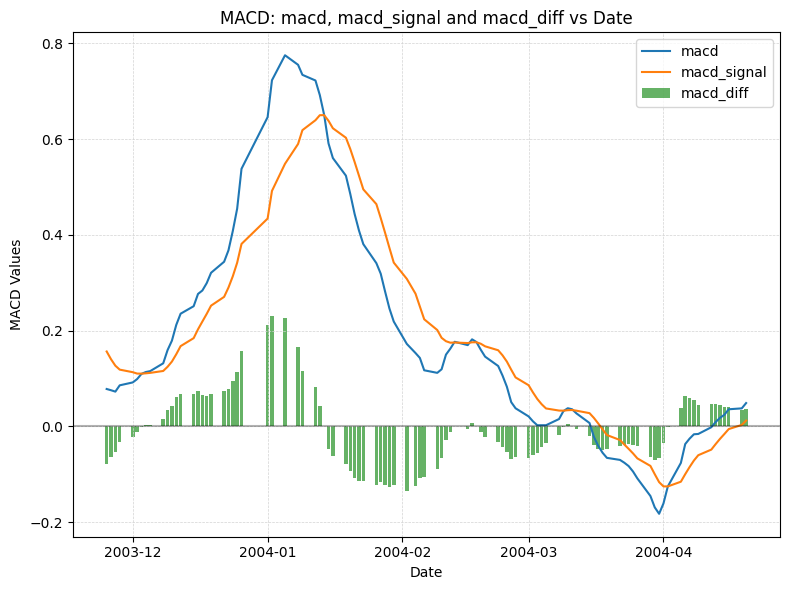

In [18]:
col_y = ['macd', 'macd_signal' ]
col_hist =  'macd_diff'
col_x = 'Date'
plot_macd(col_name_y=col_y, col_name_hist=col_hist, col_name_x=col_x, df=new_df[500:600])

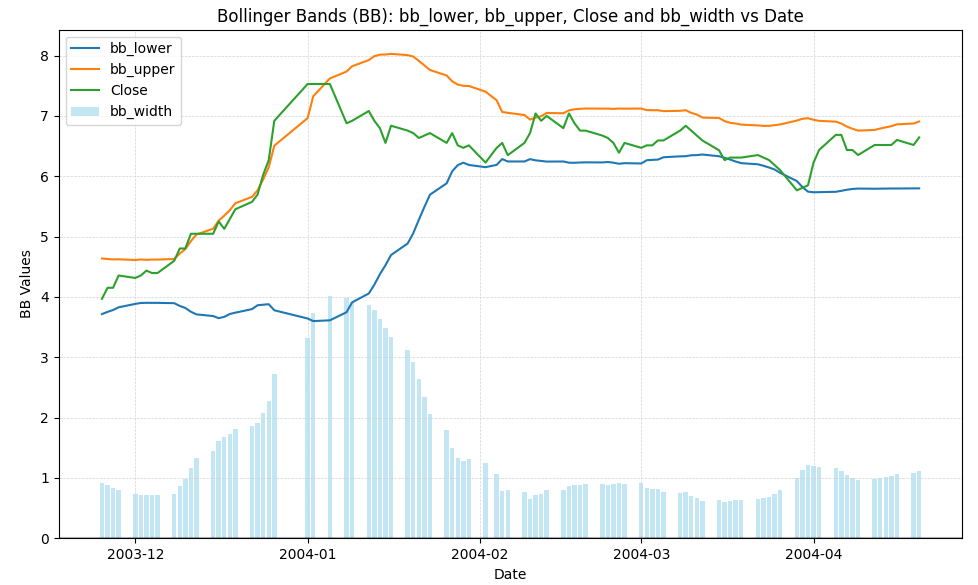

#### target plot

#### selecting feature

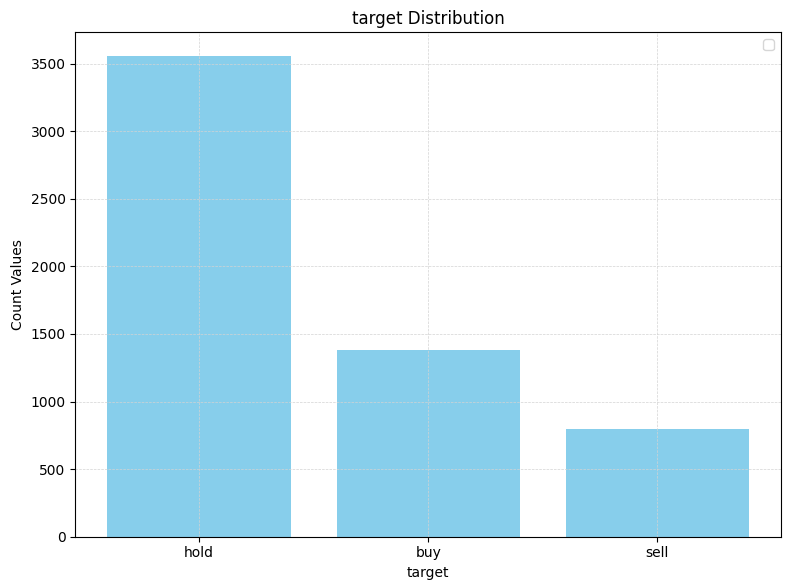

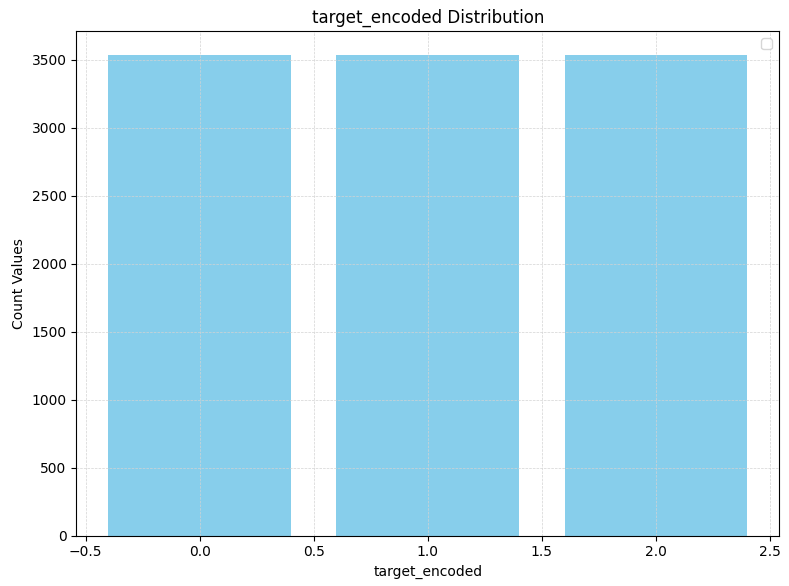

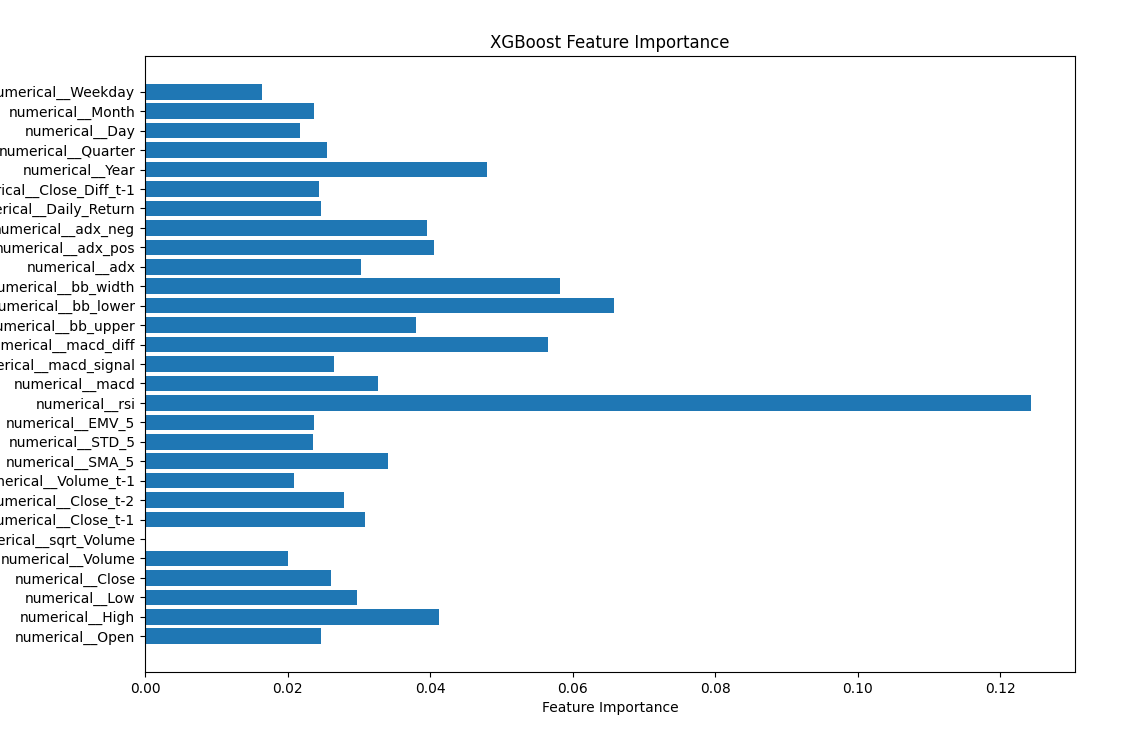

In [36]:
def features_selecting(df, plot=False, save=False):
    print('features selection.............................')
    df['target_encoded'] = LabelEncoder().fit_transform(df['target'])

    drop_cols = ['Date','target','future_return_5','rsi_result', 'macd_result', 'bb_result', 'adx_result']
    df_cleaned = df.drop(columns=drop_cols).dropna()

    columns = df_cleaned.columns.tolist()
    X = df_cleaned[columns]
    y = df_cleaned['target_encoded']

    can_use_features = anova_check(X, y, cols_name=columns)
    print(f'\nAfter Anova from {len(columns)} to {len(can_use_features)} \ncan_use_features: {can_use_features}')

    if plot:
        for i in range(0, len(can_use_features), 4):
            plot_box(df, cols=can_use_features[i:i+4], n_col=4, figsize=(10, 6))


    after_box = ['Volume', 'STD_5', 'macd', 'macd_signal', 'bb_width', 'Daily_Return','Closr_diff_t-1']
    can_use_features = [i for i in can_use_features if i not in after_box]
    print(f"\nLasted features after box plot: from 27 to {len(can_use_features)} : \n{can_use_features}")

    if save:
        file_name = 'data/PTT_BK_usage.csv'
        df.to_csv(file_name)
        print('Saved CSV completed !!')

    return can_use_features

In [37]:
features = features_selecting(new_df, plot=False, save=False)

features selection.............................

After Anova from 31 to 28 
can_use_features: ['Open', 'High', 'Low', 'Close', 'Volume', 'log_Volume', 'sqrt_Volume', 'Close_t-1', 'Close_t-2', 'Volume_t-1', 'SMA_5', 'STD_5', 'EMV_5', 'rsi', 'macd', 'macd_signal', 'macd_diff', 'bb_upper', 'bb_lower', 'bb_width', 'adx', 'adx_pos', 'adx_neg', 'Daily_Return', 'Close_Diff_t-1', 'Year', 'Day', 'target_encoded']

Lasted features after box plot: from 27 to 22 : 
['Open', 'High', 'Low', 'Close', 'log_Volume', 'sqrt_Volume', 'Close_t-1', 'Close_t-2', 'Volume_t-1', 'SMA_5', 'EMV_5', 'rsi', 'macd_diff', 'bb_upper', 'bb_lower', 'adx', 'adx_pos', 'adx_neg', 'Close_Diff_t-1', 'Year', 'Day', 'target_encoded']


/home/jpp/projects/04_set50/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


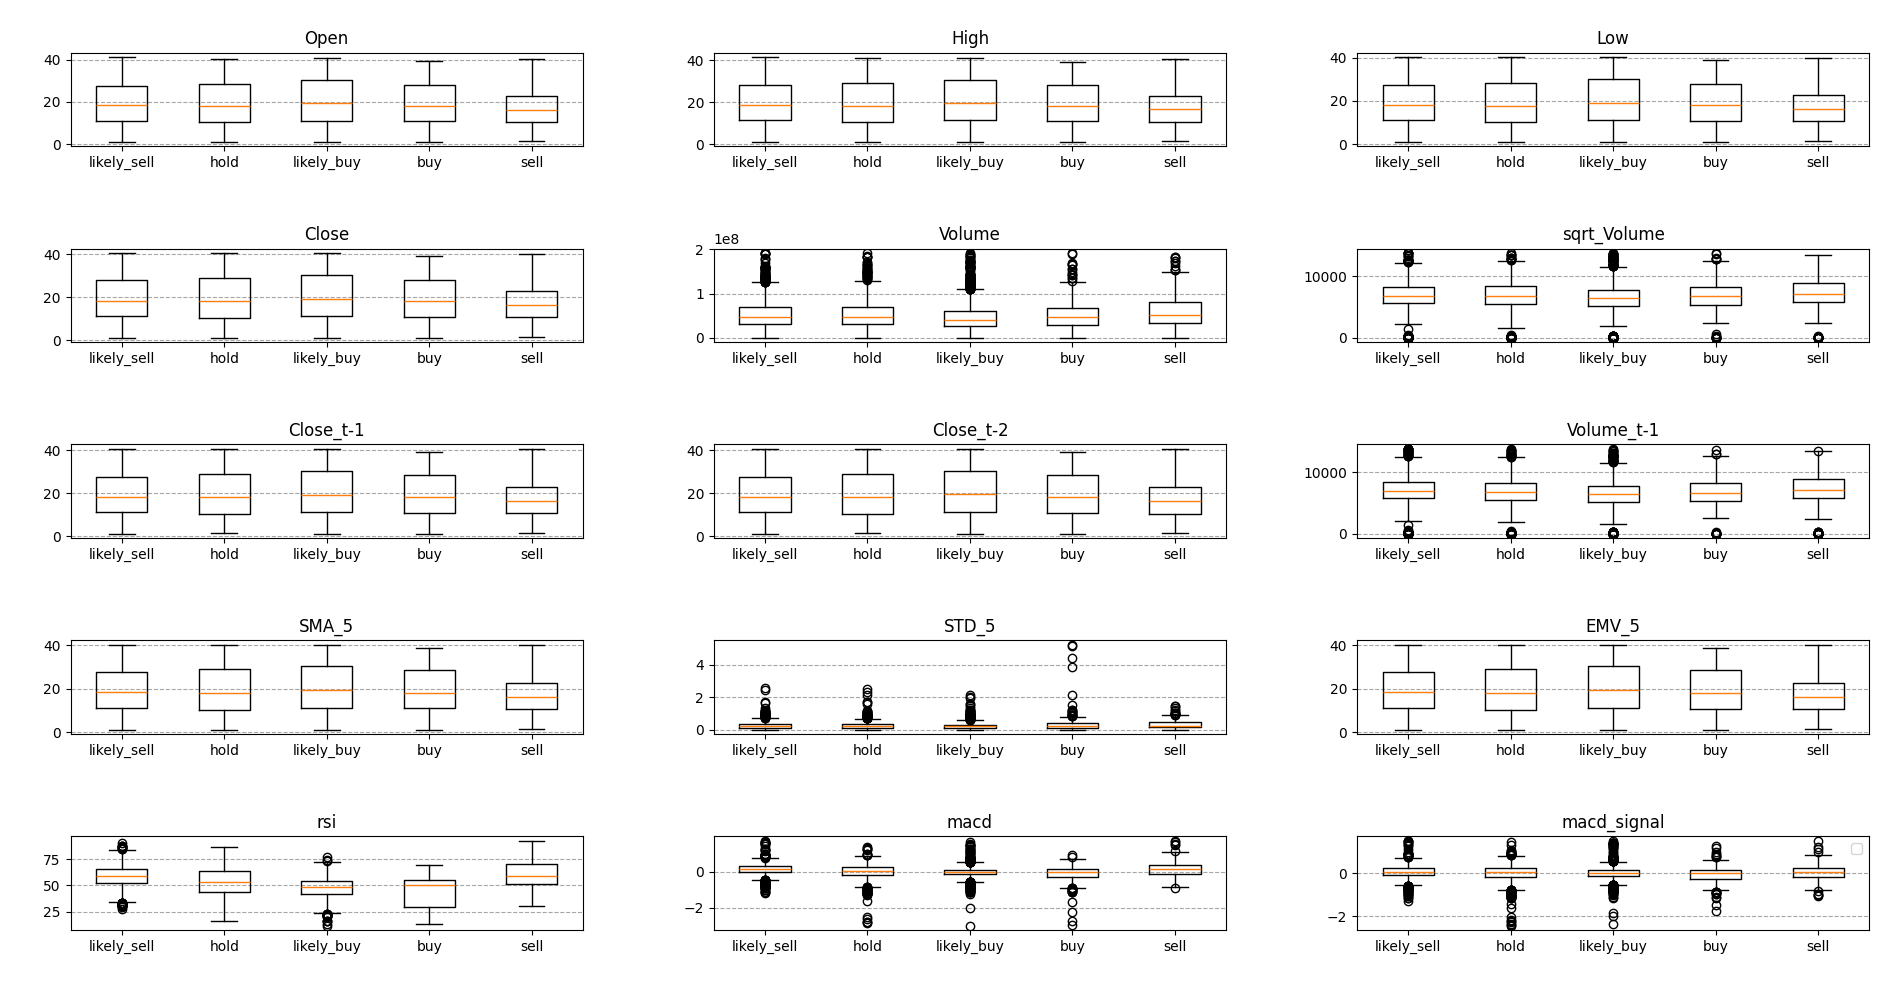

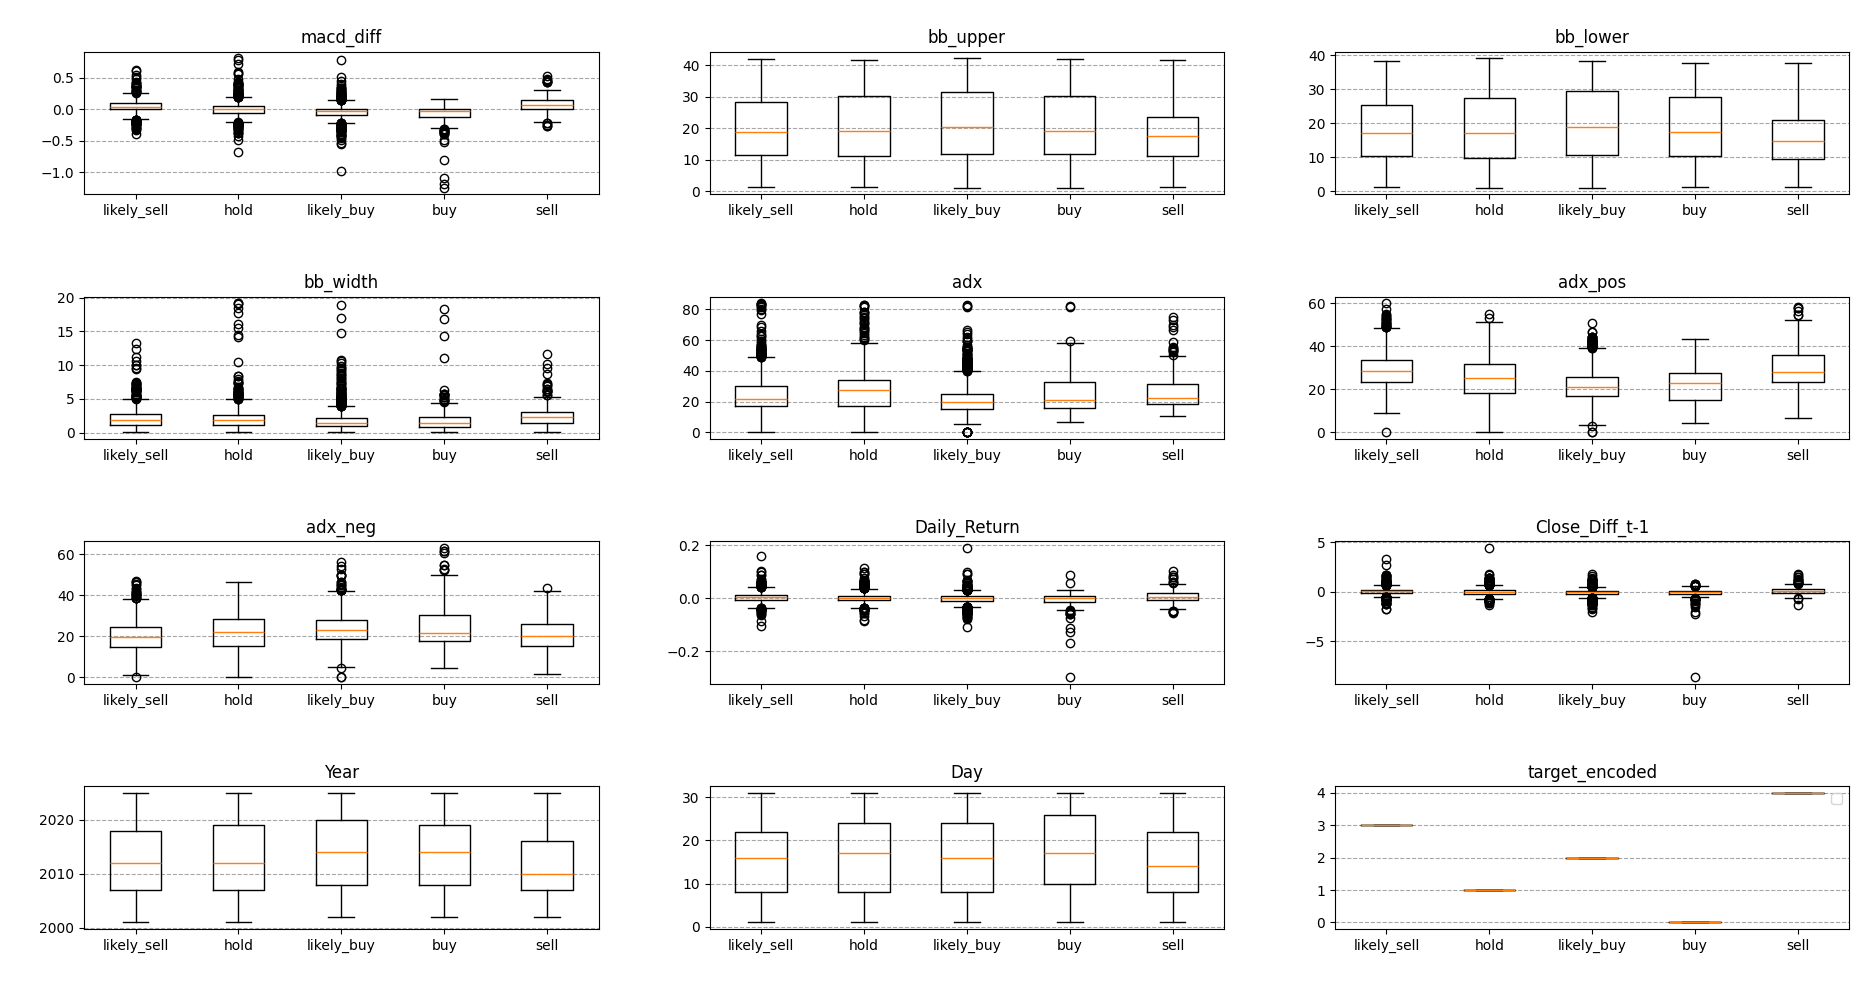

In [38]:
features

['Open',
 'High',
 'Low',
 'Close',
 'log_Volume',
 'sqrt_Volume',
 'Close_t-1',
 'Close_t-2',
 'Volume_t-1',
 'SMA_5',
 'EMV_5',
 'rsi',
 'macd_diff',
 'bb_upper',
 'bb_lower',
 'adx',
 'adx_pos',
 'adx_neg',
 'Close_Diff_t-1',
 'Year',
 'Day',
 'target_encoded']